# BoW in Sklearn
We can write a function to return a BoW matrix

Below, we will see how we can build a BoW matrix by calling CountVectorizer in sklearn

In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

sentences = ['Data Science is the best.',
            'Data Science has cool topics.',
            'Are these the best topics?',
            'Is Data Science the best track?']


vectorizer = CountVectorizer()
# create a term-document matrix: assign each word a tuple: 
# first number is the sentence, and the second is the unique number that corresponds to the word
# for example, if the word "one" is assigned the number 3,
# then the word "one" that is used in the third sentence is represented by the tuple (2,3)
X = vectorizer.fit_transform(sentences)

# from the term-document matrix, create the BoW matrix
print(X.toarray())

[[0 1 0 1 0 1 1 1 0 0 0]
 [0 0 1 1 1 0 1 0 0 1 0]
 [1 1 0 0 0 0 0 1 1 1 0]
 [0 1 0 1 0 1 1 1 0 0 1]]


## How do we get unique words?

In [2]:
# Get the unique words
print(vectorizer.get_feature_names())

['are', 'best', 'cool', 'data', 'has', 'is', 'science', 'the', 'these', 'topics', 'track']


In [3]:
len(vectorizer.get_feature_names())

11

/Users/ChrisBarnes/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


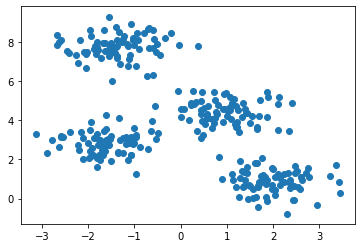

In [4]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

# create a sample dataset with 300 data points and 4 cluster centers
X, y = make_blobs(n_samples=300, centers=4,
                          random_state=0, cluster_std=0.60)

# plot the data
plt.scatter(X[:, 0], X[:, 1])

In [5]:
from sklearn.cluster import KMeans

# k-means algorithm where k = 4
km = KMeans(n_clusters=4)
# perform k-means clustering on the previous dataset
km.fit(X)
# print the 4 cluster centers
print(km.cluster_centers_)

[[-1.37324398  7.75368871]
 [ 1.98258281  0.86771314]
 [-1.58438467  2.83081263]
 [ 0.94973532  4.41906906]]


In [6]:
km.predict(X)

array([1, 0, 3, 0, 1, 1, 2, 3, 0, 0, 2, 0, 3, 0, 1, 3, 3, 1, 2, 2, 1, 1,
       3, 2, 2, 3, 1, 3, 2, 3, 0, 0, 3, 0, 0, 0, 0, 0, 2, 1, 3, 2, 3, 3,
       2, 2, 0, 2, 0, 1, 2, 1, 0, 1, 1, 2, 0, 2, 0, 1, 0, 3, 0, 2, 2, 2,
       0, 1, 0, 2, 3, 2, 0, 2, 2, 0, 2, 3, 1, 0, 1, 3, 1, 1, 0, 3, 1, 3,
       0, 0, 3, 1, 0, 2, 2, 3, 1, 1, 3, 2, 0, 1, 0, 1, 3, 1, 1, 3, 0, 3,
       2, 2, 1, 0, 1, 3, 0, 1, 1, 3, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 0, 2,
       2, 1, 0, 2, 2, 0, 3, 0, 0, 2, 3, 2, 3, 2, 0, 3, 0, 0, 0, 3, 0, 3,
       1, 2, 0, 2, 1, 3, 0, 3, 3, 1, 3, 2, 2, 3, 1, 3, 3, 0, 1, 3, 2, 0,
       1, 1, 3, 2, 1, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 2, 3, 3, 2, 2, 2, 3,
       2, 0, 3, 2, 1, 2, 3, 0, 2, 0, 3, 0, 3, 2, 3, 3, 0, 2, 2, 1, 1, 3,
       0, 1, 1, 2, 1, 2, 3, 0, 0, 3, 3, 0, 3, 1, 2, 3, 1, 2, 0, 2, 1, 3,
       1, 0, 0, 0, 0, 2, 2, 0, 3, 2, 1, 3, 2, 2, 2, 1, 1, 0, 3, 3, 2, 1,
       0, 2, 3, 0, 3, 1, 1, 2, 2, 3, 1, 1, 1, 3, 0, 0, 1, 1, 3, 1, 1, 1,
       0, 2, 0, 3, 1, 1, 0, 0, 0, 1, 1, 3, 0, 2], d

In [7]:
import pandas as pd

pd.Series(km.predict(X)).value_counts()
# nums = [0, 0, 0, 0]
# for i in km.predict(X):
#     if i == 0:
#         nums[0] += 1
#     if i == 1:
#         nums[1] += 1
#     if i == 2:
#         nums[2] += 1
#     if i == 3:
#         nums[3] += 1
# print(nums)

3    75
2    75
1    75
0    75
dtype: int64

# distortions & Inertia

In [8]:
import numpy as np
from scipy.spatial import distance

def distortions_Inertia(Data):
    distortions = []
    K = range(1, 10)
    for k in K:
        # fit the k-means for a given k to the data (X)
        km = KMeans(n_clusters=k)
        km.fit(Data)
        # distance.cdist finds the squared distances
        # axis=1 allows us to keep the min for each sample, not jsut the min across the entire dataset
        # find the closest distance for each sample to a center, and take the average
        distortions.append(sum(np.min(distance.cdist(X, km.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

    # Plot the elbow: bx- = use a solid (-) blue (b) line, 
    # and mark the x-axis points with an x (x)
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()
#     ------------------------------------------------------
    sum_of_squared_distances = []
    K = range(1,15)
    for k in K:
        km = KMeans(n_clusters=k)
        km.fit(Data)
        # inertia is an attribute of km!
        # https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
        sum_of_squared_distances.append(km.inertia_)


        # Plot the elbow
    plt.plot(K, sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

## Activity - Elbow Method (7 min)
Using the starter code below, prove that 6 is the optimal K for clustering the data using k-means using the elbow method. You can use either Distortion or Inertia.

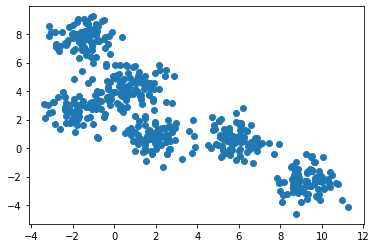

In [9]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

Data, blob_y = make_blobs(n_samples=500, centers=6,
                          random_state=0, cluster_std=0.80)

# plot the data
plt.scatter(Data[:, 0], Data[:, 1])

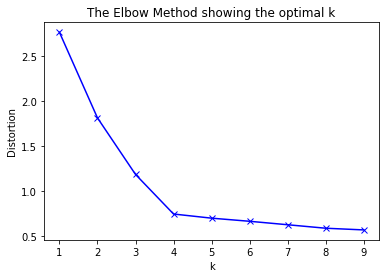

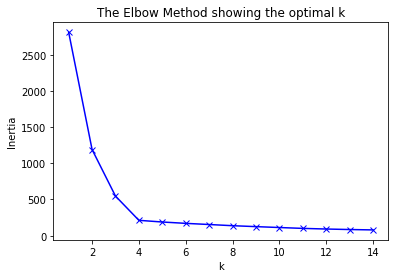

In [10]:
distortions_Inertia(X)

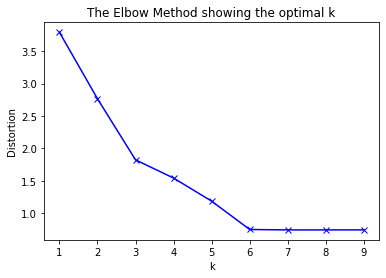

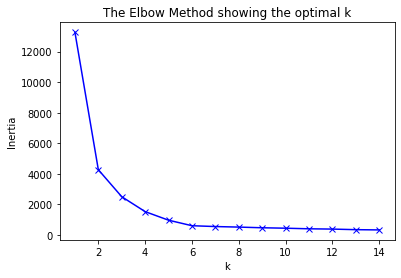

In [11]:
distortions_Inertia(Data)

In [28]:
sentences = ["This little kitty came to play when I was eating at a restaurant.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is incredible.",
             "If you open 100 tab in google you get a smiley face.",
             "Best cat photo I've ever taken.",
             "Climbing ninja cat.",
             "Impressed with google map feedback.",
             "Key promoter extension for Google Chrome."]


vectorizer = CountVectorizer(stop_words="english")
X = vectorizer.fit_transform(sentences)
# print(X.toarray())
# print("\n--\n")

# Get the unique words
print(len(vectorizer.get_feature_names()), "Total words")
print(vectorizer.get_feature_names())
print("\n--\n")

# plot the data
# plt.scatter(X[:, 0], X[:, 1])
# print("\n--\n")

# k-means algorithm where k = 2
km = KMeans(n_clusters=2)
# perform k-means clustering on the previous dataset
km.fit(X)
# print the 4 cluster centers
print(km.cluster_centers_)
print("\n--\n")

print(dict(pd.Series(km.predict(X)).value_counts()))

33 Total words
['100', 'app', 'belly', 'best', 'came', 'cat', 'chrome', 'climbing', 'eating', 'extension', 'face', 'feedback', 'google', 'impressed', 'incredible', 'key', 'kitten', 'kitty', 'little', 'map', 'merley', 'ninja', 'open', 'photo', 'play', 'promoter', 'restaurant', 'smiley', 'squooshy', 'tab', 'taken', 'translate', 've']

--

[[0.25 0.25 0.   0.   0.   0.   0.25 0.   0.   0.25 0.25 0.25 1.   0.25
  0.25 0.25 0.   0.   0.   0.25 0.   0.   0.25 0.   0.   0.25 0.   0.25
  0.   0.25 0.   0.25 0.  ]
 [0.   0.   0.25 0.5  0.25 0.5  0.   0.25 0.25 0.   0.   0.   0.   0.
  0.   0.   0.25 0.25 0.25 0.   0.25 0.25 0.   0.25 0.25 0.   0.25 0.
  0.25 0.   0.25 0.   0.25]]

--

{1: 4, 0: 4}


In [30]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

sentences = ["This little kitty came to play when I was eating at a restaurant.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is incredible.",
             "If you open 100 tab in google you get a smiley face.",
             "Best cat photo I've ever taken.",
             "Climbing ninja cat.",
             "Impressed with google map feedback.",
             "Key promoter extension for Google Chrome."]

# remove stop words from sentences (and, or, is, ...) and instantiate the Bag-of-Word 
vectorizer = CountVectorizer(stop_words='english')
# transform sentences into numerical arrays 
X = vectorizer.fit_transform(sentences)
# print unique words (vocabulary)
print(vectorizer.get_feature_names())
print(X.shape)
# We know there are two group of sentences -> Group 1: cats | Group 2: Google
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++')
model.fit(X)

# Testing our model: For a new sentence, let's see how the model will cluster it. 

# first we should convert the sentence to a numerical array
Y = vectorizer.transform(["chrome browser to open."])
print('Y:')
print(Y.toarray())
prediction = model.predict(Y)
print(prediction)
# Let's do the same for another sentence
Y = vectorizer.transform(["My cat is hungry."])
prediction = model.predict(Y)
print(prediction)
# Lets see the model prediction for training docs
print(model.predict(X))

['100', 'app', 'belly', 'best', 'came', 'cat', 'chrome', 'climbing', 'eating', 'extension', 'face', 'feedback', 'google', 'impressed', 'incredible', 'key', 'kitten', 'kitty', 'little', 'map', 'merley', 'ninja', 'open', 'photo', 'play', 'promoter', 'restaurant', 'smiley', 'squooshy', 'tab', 'taken', 'translate', 've']
(8, 33)
Y:
[[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]]
[0]
[1]
[1 1 0 0 1 1 0 0]
